# In this notebook we visualize effects of different parameters in creating flat maps

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set_theme()

# Importing scores from simulations

In [2]:
h5_dirs = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/background_scores_1//*/*.h5" # 
dfs = []
for h5_file in glob.glob(h5_dirs):
    dfs.append(akita_utils.io.h5_to_df(h5_file, drop_duplicates_key=None))    
dfs = pd.concat(dfs)

,GC_content,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,ctcf_selection_threshold,locus_specification,map_score_threshold,mutation_method,out_folder,shuffle_parameter
0,0.437594,428.5000,95.5625,861.500,1403.000,150.7500,188.6250,5,"chr1,126789632,128100352",5500,random,data,4
1,0.437594,420.0000,115.0625,882.000,1423.000,166.6250,204.5000,5,"chr1,126789632,128100352",6000,random,data,4
2,0.437594,419.2500,123.5625,881.000,1412.000,172.2500,207.2500,5,"chr1,126789632,128100352",6500,random,data,4
3,0.437594,416.0000,111.7500,865.000,1395.000,165.6250,201.2500,8,"chr1,126789632,128100352",5500,random,data,4
4,0.437594,418.5000,123.4375,889.500,1433.000,173.7500,211.6250,8,"chr1,126789632,128100352",6000,random,data,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.502920,106.0625,106.7500,181.375,184.375,152.6250,135.1250,8,"chr2,27127808,28438528",6000,permute_motif,data,8
266,0.502920,81.0625,88.7500,103.625,97.250,96.5625,82.8750,8,"chr2,27127808,28438528",6500,permute_motif,data,8
267,0.502920,101.1250,102.1250,140.000,134.250,126.6250,110.9375,12,"chr2,27127808,28438528",5500,permute_motif,data,8
268,0.502920,98.1250,99.8125,135.875,129.875,123.0000,107.6250,12,"chr2,27127808,28438528",6000,permute_motif,data,8


In [3]:
dfs["mean_SCD_score"] = (dfs["SCD_h1_m1_t0"]+dfs["SCD_h1_m1_t1"]+dfs["SCD_h1_m1_t2"]+dfs["SCD_h1_m1_t3"]+dfs["SCD_h1_m1_t4"]+dfs["SCD_h1_m1_t5"])/6
targets=range(5)

# General scores distribution

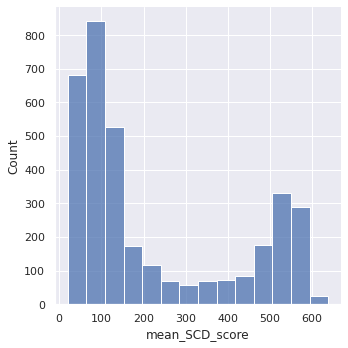

In [4]:
dfs.reset_index(drop=True, inplace=True)
sns.displot(dfs, x="mean_SCD_score")

# shuffle parameter effect exploration

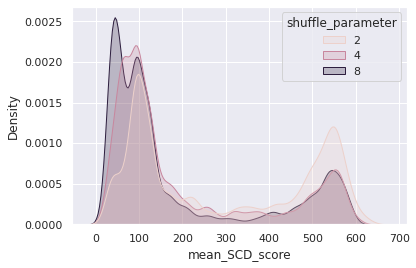

<AxesSubplot:xlabel='shuffle_parameter', ylabel='mean_SCD_score'>

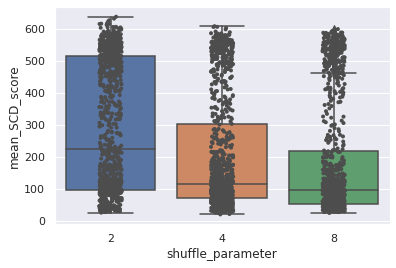

In [5]:
sns.color_palette("tab10")
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="shuffle_parameter", bw_adjust=.3, fill=True)
plt.show()
# sns.jointplot(data=dfs.loc[dfs["mutation_method"]=="permute_whole_seq"], y=f"mean_SCD_score", hue="shuffle_parameter", x = "shuffle_parameter") #, hue="shuffle_parameter"

sns.boxplot(data=dfs, x='shuffle_parameter', y="mean_SCD_score")
sns.stripplot(x="shuffle_parameter", y="mean_SCD_score", data=dfs,
              size=4, color=".3", linewidth=0)


# map threshold effect exploration

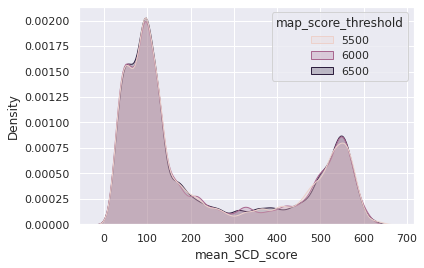

<AxesSubplot:xlabel='map_score_threshold', ylabel='mean_SCD_score'>

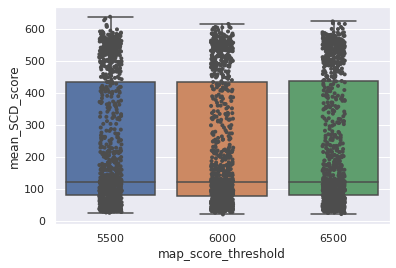

In [6]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="map_score_threshold", bw_adjust=.3, fill=True)
plt.show()
sns.boxplot(data=dfs, x='map_score_threshold', y="mean_SCD_score")
sns.stripplot(x="map_score_threshold", y="mean_SCD_score", data=dfs,
              size=4, color=".3", linewidth=0)

# ctcf selection threshold effect exploration

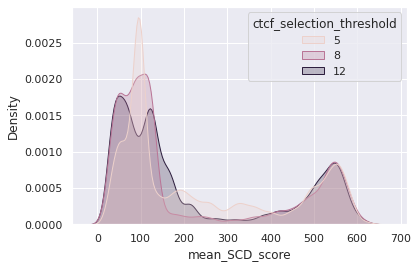

<AxesSubplot:xlabel='ctcf_selection_threshold', ylabel='mean_SCD_score'>

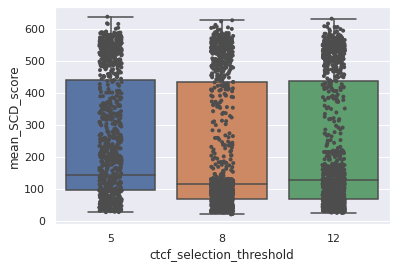

In [7]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_selection_threshold", bw_adjust=.3, fill=True)
plt.show()
sns.boxplot(data=dfs, x='ctcf_selection_threshold', y="mean_SCD_score")
sns.stripplot(x="ctcf_selection_threshold", y="mean_SCD_score", data=dfs,
              size=4, color=".3", linewidth=0)


# mutation method effect exploration

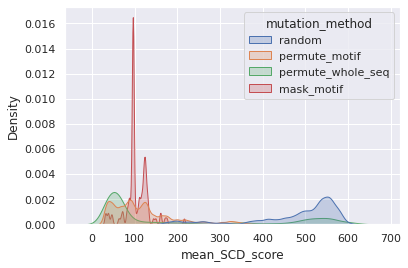

<AxesSubplot:xlabel='mutation_method', ylabel='mean_SCD_score'>

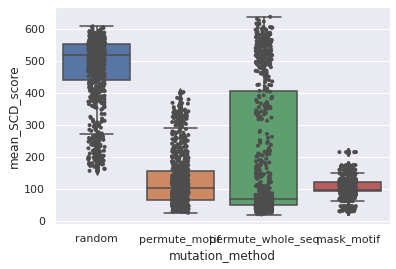

In [8]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="mutation_method", bw_adjust=.3, fill=True)
plt.show()
sns.boxplot(data=dfs, x='mutation_method', y="mean_SCD_score")
sns.stripplot(x="mutation_method", y="mean_SCD_score", data=dfs,
              size=4, color=".3", linewidth=0)

# Deep dive into mutation methods

### Disecting mutation methods

Here i go on to disect the different mutation methods to further understand the underlying factors.

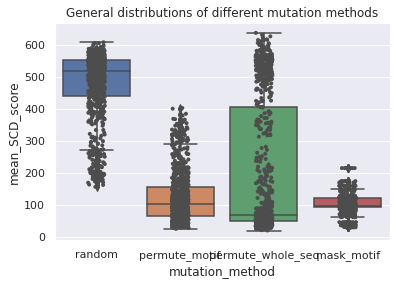

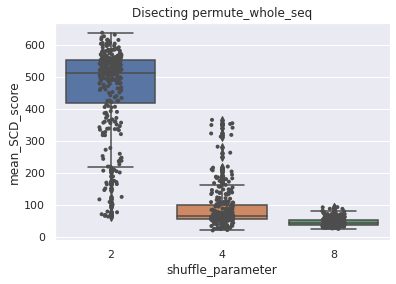

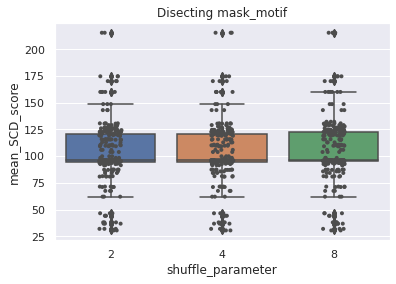

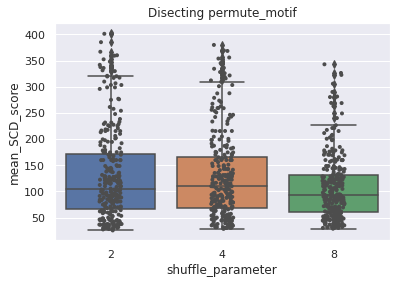

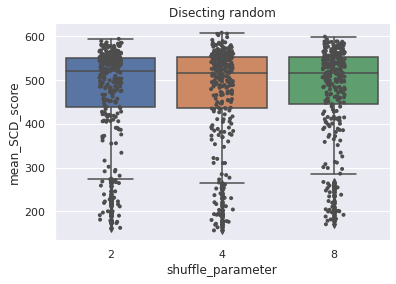

In [9]:
# plt.scatter(dfs['shuffle_parameter'],dfs['SCD_h1_m1_t5'])
sns.boxplot(data=dfs, x='mutation_method', y="mean_SCD_score")
sns.stripplot(x="mutation_method", y="mean_SCD_score", data=dfs,
              size=4, color=".3", linewidth=0)
plt.title("General distributions of different mutation methods")
plt.show()
plt.close()

for score in ['permute_whole_seq','mask_motif','permute_motif','random']:
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.boxplot(data=df_dummy_parameter, x='shuffle_parameter', y="mean_SCD_score")
    sns.stripplot(x="shuffle_parameter", y="mean_SCD_score", data=df_dummy_parameter,
                  size=4, color=".3", linewidth=0)
    plt.title(f"Disecting {score}")
    plt.show()
    plt.close()

# GC content effect exploration

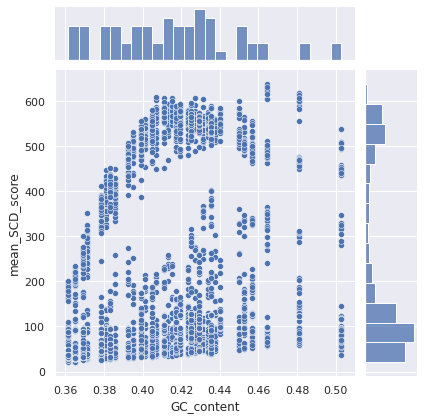

In [10]:
# for score in ['permute_whole_seq','mask_motif','permute_motif','random']:

# .loc[dfs["mutation_method"]=="permute_whole_seq"]
# dfs1 = dfs.loc[dfs["shuffle_parameter"]== 8]

sns.jointplot(data=dfs, y=f"mean_SCD_score", x = "GC_content") #, hue="shuffle_parameter"


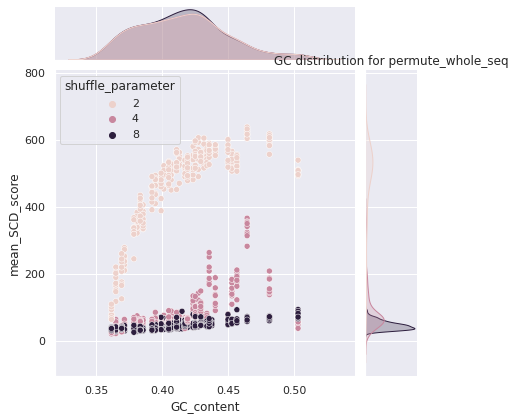

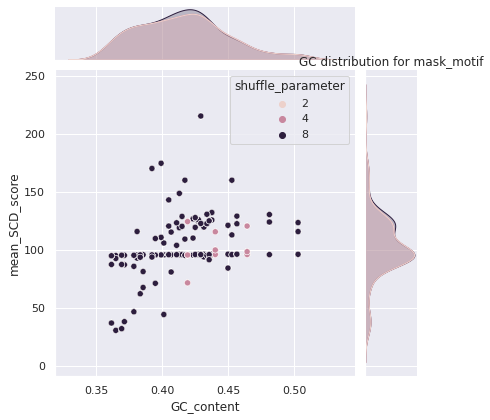

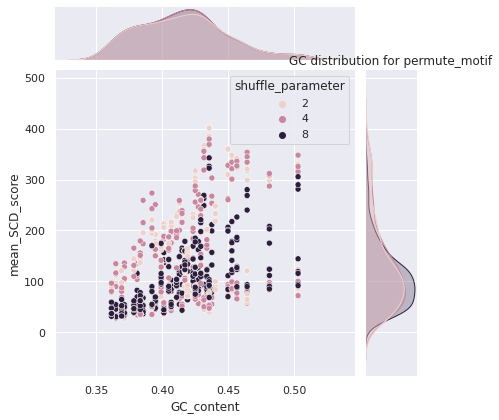

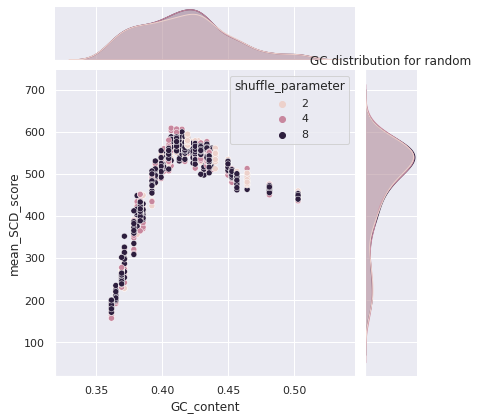

In [11]:
# for score in ['permute_whole_seq','mask_motif','permute_motif','random']:
# 
# dfs1 = dfs.loc[dfs["shuffle_parameter"]== 8]
for score in ['permute_whole_seq','mask_motif','permute_motif','random']:
    sns.jointplot(data=dfs.loc[dfs["mutation_method"]==score], y=f"mean_SCD_score", x = "GC_content", hue="shuffle_parameter", color=".3")
    plt.title(f"GC distribution for {score}")